In [0]:
# Por si alguien corre en python2
from __future__ import division

# Preparamos todo para correr
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


# Repaso Algoritmos de Clasificación:

## Función Discriminante

Mientras que en regresión lineal teniamos una (o muchas) variables continuas $t(\vec{x})$, aquí sabemos que cada $\vec{x}$ pertenece a una (única) clase $C_{k}$. El objetivo es entonces, teniendo un set de entrenamiento de inputs y etiquetas $(\vec{x}_{i},t_{i})$, poder asignar una clase $C_{k}$ a un nuevo input $\vec{x}$. Usualmente trabajaremos con la asignación $t_{k}=(... 1,..)^{T}$. Es decir, un vector de ceros excepto en el lugar $k$, donde hay un 1.

Así como para regresión lineal podíamos tratar de obtener directamente la función discriminante, aquí podemos asignar un $y_{k,i}$ a cada $\vec{x}_{i}$:

$y_{k,i} = f(w_{0,k}+\vec{w}^{T}_{k}\vec{x}_{i})$

Donde $k$ es la clase, $\vec{w}_{k},w_{0,k}$ son los coeficientes a estimar por cada clase y $f$ es la función de activación, que constituye la primera diferencia con el enfoque de regresión lineal. Esta función de activación permite capturar mejor no linearidades y devolver un número en el intervalo $[0,1)$ para poder establecer un criterio de selección de clase. Cada criterio de selección dará lugar a _fronteras de decisión_. Si un punto cae en una frontera de decisión, se debe establecer un criterio de asignación de clase (usualmente se tira un número al azar).

La estimación de los coeficientes $\text{W}_{ik}=w_{i,k}$ puede hacerse de distintas maneras. Aquí vamos a ver tres criterios: **cuadrados mínimos**, **discriminante linear de Fisher y el perceptron**.

### Cuadrados Mínimos

Para el primer método, establecemos la asignación de la clase k-esima cuando $y_{k}>y_{j}$ para todo $j$ distinto de $k$. Con esta asignación de clase, aparecen las _fronteras de decisión_ donde $y_{k}=y_{j}$ para dos clases $kj$. Luego, minimizamos la función de error de cuadrados mínimos y obtenemos la expresión cerrada.

$\text{W}=(\text{X}^{T}\text{X})^{-1}\text{X}^{T}\text{T}$

Donde $\text{W}$ es la matriz cuya k-esima columna son los coeficientes $w_0,w_1,..,w_{D}$ de la clase k-esima, $\text{X}$ es la matriz cuya i-esima fila consiste en los coeficientes $1,x_{1},...,x_{D}$ para la medición i-esima, $\text{T}$ es la matriz de clases, donde la fila i-esima consistirá en ceros con excepción del lugar corresponde a la clase de la medición i-esima.

En particular, para el caso de dos clases, puede utilizarse únicamente un $y$ y asignar la clase 1 si $y \geq 0$ y la clase 2 si $y < 0$.

### Discriminante Linear de Fisher

Si se quiere utilizar el discriminante linear de Fisher para dos clases, se define un único $y=\vec{w}^{T}\vec{x}$ (sin $w_{0}$ y se extrae la dirección de $\vec{w}$ del vector:

$\text{S}^{-1}_{\text{W}}(\vec{\mu}_{2}-\vec{\mu}_{1})$

Donde $\vec{\mu}_{i}$ es la media de los $\vec{x}$ pertenencientes a la clase i-esima y $\text{S}_{w}$ es la varianza intra clase definida por

$\text{S}_{\text{W}}=\sum_{i \in \mathcal{C}_{1}}(\vec{x}_{i}-\vec{\mu}_{1})(\vec{x}_{i}-\vec{\mu}_{1})^{T}+\sum_{i \in \mathcal{C}_{2}}(\vec{x}_{i}-\vec{\mu}_{2})(\vec{x}_{i}-\vec{\mu}_{2})^{T}$

Una vez obtenida la dirección de $\vec{w}$, se puede obtener la _frontera de decisión_ como la recta perpendicular a $\vec{w}$.

Queda entonces encontrar la magnitud de $\vec{w}$. Algo equivalente es settear el vector $\vec{w}$ y encontrar un $y_{0}$ óptimo tal que si $y < y_{0}$ asignamos la clase 1. Esto puede hacerse numericamente o, en este caso, a ojo probando algunos valores.

## Perceptrón

El perceptron, al que ya vamos a volver, es otra forma de obtener una función de discriminación. Allí, utilizamos una función de activación $f(a)$ tal que $f(a) = 1.0$ si $a \geq 0$ y $f(a) = -1.0$ si $a < 0$.

Además, introducimos nuevamente funciones $\phi_{j}$, usualmente con $\phi_{0}=1.0$ de manera tal que 

$y(\vec{x})=f(\vec{w}^{T}\vec{\phi}(\vec{x}))$

Para este algoritmo, tomamos las etiquetas $t = 1$ para $\mathcal{C}_{1}$ y $t = -1$ para $\mathcal{C}_{2}$.

Para el perceptron puede derivarse un algoritmo secuencial de optimización de los $\vec{w}$. Para una medición $\vec{x}_{n}$, si el perceptron clasifica adecuadamente se prosigue pero si se clasifica erroneamente, se actualiza $\vec{w}$ de la siguiente manera:

$\vec{w}^{\tau+1} = \vec{w}^{\tau}+\vec{\phi}(\vec{x}_{n})t_{n}$

## Regresión Logística

En lugar de buscar directamente la función discriminadora podemos tratar de modelar los posterior de nuestro clasificador obteniendo lo que se llama un _modelo discriminador probabilistico_. Uno de estos modelos es el de la Regresión Logistica.

En este modelado, que veremos para dos clases posibles, para un dado $\vec{x}$ modelamos la prioridad de que pertenezca a la clase $\mathcal{C}_{1}$ como:

$p(\mathcal{C}_{1}|\vec{x})=\sigma(\vec{w}^{T}\vec{\phi}(\vec{x}))$

Con $p(\mathcal{C}_{2}|\vec{x})=1-p(\mathcal{C}_{1}|\vec{x})$. $\sigma$ es la función sigmoide

$\sigma(a)=\frac{1}{1+e^{-a}}$

Para este modelo, si se tienen $M$ funciones fijas $\phi$, se tienen $M$ parametros ajustables. 

Para un dataset $\vec{x}_{n}$, con $n=1,..,N$, la verosimilitud es

$p(\text{T}|\vec{w})=\prod_{n=1}^{N}y^{t_n}_{n}(1-y_{n})^{1-t_n}$

De manera tal que, maximizando la verosimilitud, podemos definir un algoritmo iterativo para encontrar los $\vec{w}$, el Iterative Reweighted Least Squares o IRLS. Para la regresión logistica, la función de error es la cross-entropy:

$E(\vec{w})=-\sum_{n=1}^{N}(t_{n}\text{ln}y_{n}+(1-t_{n})\text{ln}(1-y_{n}))$

Para minimizar este error, el algoritmo utiliza una actualización de Newton-Ralphson:

$\vec{w}^{\text{nuevo}}=\vec{w}^{\text{viejo}}-\text{H}^{-1}\nabla E(\vec{w})$

Donde $\nabla E(\vec{w})$ es el gradiente del error y $\text{H}$ es la matriz Hessiana. Para la regresion logistica, uno puede llegar a sus propias ecuaciones normales _iterativas_

$\vec{w}^{\text{nuevo}}=(\text{$\Phi$}^{T}\text{R}\text{$\Phi$})^{-1}\text{$\Phi$}^{T}\text{R}\text{z}$

Con $\Phi$ la matriz de disenio, $\text{R}$ la matriz diagonal cuyos elementos son $y_{n}(1-y_{n})$ y $\text{z}$ es un vector que se calcula como:

$\text{z}=\text{$\Phi$}\vec{w}^{\text{viejo}}-\text{R}^{-1}(\text{Y}-\text{T})$

Con $\text{Y}$ e $\text{T}$ los vectores de predicciones y respuestas respectivamente. Noten que los pesos entran varias veces: en la matriz $\text{R}$, en el vector $\text{Y}$ y explicitamente en $\text{z}$. Es por esto que es iterativo.


Este algoritmo también puede aplicarse al caso de regresión lineal, viendo que el algoritmo de Newton-Raphson converge a la solución cerrada en 1 paso. La diferencia aquí es la función de activación sigmoide. Además, quiero enfatizar que este algoritmo es iterativo pero no es secuencial, ya que utiliza todos los datos del dataset.

# Ejercicio 1: Clasificación con función discriminante
 Clasifique los siguientes Datasets utilizando función discriminante optimizada por cuadrados mínimos y por el discriminante lineal de Fisher. Encuentre los coeficientes $\text{W}$ para el caso de dos clases, con la frontera de decisión y la tasa de misclasificación con ambos métodos. Para esto último, utilice el método de K-Folding.

Discuta que diferencia hay entre ambos datasets y como impacto esto a la performance de los algoritmos.

**a.** Dataset 1

(-1.0, 10.0)

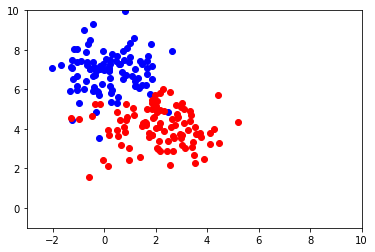

In [0]:
from scipy.stats import  multivariate_normal
X1=multivariate_normal.rvs(size=100,mean=[0,7],cov=[[1,0.0],[0.0, 1]])
X2=multivariate_normal.rvs(size=100,mean=[2,4],cov=[[2,0.0],[0.0, 1]])
plt.scatter(X1[:,0],X1[:,1],color='blue')
plt.scatter(X2[:,0],X2[:,1],color='red')
plt.xlim((-3,10))
plt.ylim((-1,10))

**b.** Dataset 2

(-1.0, 10.0)

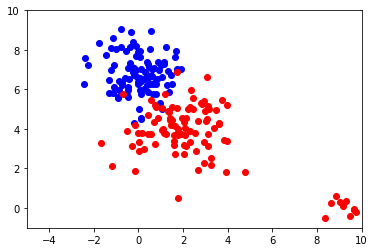

In [0]:
from scipy.stats import  multivariate_normal
X1=multivariate_normal.rvs(size=100,mean=[0,7],cov=[[1,0.0],[0.0, 1]])
aux1=multivariate_normal.rvs(size=90,mean=[2,4],cov=[[2,0.0],[0.0, 1]])
aux2=multivariate_normal.rvs(size=10,mean=[9,0],cov=[[0.2,0.0],[0.0, 0.1]])
X2=np.zeros(X1.shape)
X2[:,0]=np.append(aux1[:,0],aux2[:,0])
X2[:,1]=np.append(aux1[:,1],aux2[:,1])
plt.scatter(X1[:,0],X1[:,1],color='blue')
plt.scatter(X2[:,0],X2[:,1],color='red')
plt.xlim((-5,10))
plt.ylim((-1,10))

**c.** Repita la clasificación en ambos Datasets utilizando la implementación provista en la clase ``sklearn.discriminant_analysis.LinearDiscriminantAnalysis()``

NOTA: Para utilizar el algoritmo de cuadrados mínimos, debe setear el parámetro ``solver='lsqr'``. Para utilizar el discriminante lineal de Fisher, utilice `` solver=‘eigen’``.

# Ejercicio 2: El Perceptron


**a.** 
Utilice un perceptron para realizar clasificación en el primer dataset del ejercicio anterior y vea si consigue una buena convergencia.

**b.** Repita el ejercicio haciendo uso de la implementación provista en la clase ``sklearn.linear_model.Perceptron()``.

# Ejercicio 3: Regresión Logística

**a.** Aplique clasificación por Regresión Logística a los dos datasets del Ejercicio 1.

*Nota:* Para favorecer la convergencia sin problemas numéricos, utilice como valor inicial de $\vec{w}$ el resultado de alguno de los algoritmos previos.

**b.** Repita el ejercicio haciendo uso de la implementación provista en la clase ``sklearn.linear_model.LogisticRegression()`` 